# Tải tệp dữ liệu vào dataframe

In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path = r"C:\Users\pc\Documents\Test_finpro\Data\MSN.csv"
df_msn = pd.read_csv(file_path)
df_msn.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


# Xử lý dữ liệu

## Kiểm tra và xử lý dữ liệu NA

In [4]:
missing_data = df_msn.isnull()
missing_data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts(), "\n")

Ticker
False    135354
Name: Ticker, dtype: int64 

Date/Time
False    135354
Name: Date/Time, dtype: int64 

Open
False    135354
Name: Open, dtype: int64 

High
False    135354
Name: High, dtype: int64 

Low
False    135354
Name: Low, dtype: int64 

Close
False    135354
Name: Close, dtype: int64 

Volume
False    135354
Name: Volume, dtype: int64 

Open Interest
False    135354
Name: Open Interest, dtype: int64 



Tập dữ liệu không có ô trống

## Kiểm tra và sửa lại định dạng dữ liệu không đúng

In [6]:
df_msn.dtypes

Ticker            object
Date/Time         object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Open Interest      int64
dtype: object

In [7]:
# Sửa lại loại dữ liệu cột Date/Time sang định dạng datetime
df_msn[["Date/Time"]] = df_msn[["Date/Time"]].astype("datetime64")
df_msn.dtypes

Ticker                   object
Date/Time        datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
Open Interest             int64
dtype: object

In [8]:
df_msn.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0
1,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0
2,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0
3,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0
4,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0


# Phân tích dữ liệu khám phá

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Phân tích dữ liệu ngày tháng

In [11]:
date_frame = df_msn["Date/Time"].dt.date.to_frame()
print("Tập dữ liệu chứa thông tin giá cổ phiếu từ ngày", min(date_frame["Date/Time"]), "đến ngày", max(date_frame["Date/Time"]))
print("Tổng số ngày là", (max(date_frame["Date/Time"]) - min(date_frame["Date/Time"])).days, "ngày")

Tập dữ liệu chứa thông tin giá cổ phiếu từ ngày 2017-12-25 đến ngày 2020-12-22
Tổng số ngày là 1093 ngày


In [12]:
df_msn.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


## Xem sự phân bổ dữ liệu

<Axes: >

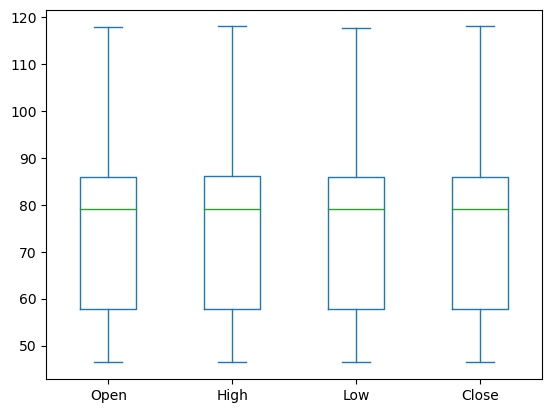

In [13]:
df_msn[["Open", "High", "Low", "Close"]].plot(kind="box")

## Xem biến động giá đóng cửa qua biểu đồ

Text(0.5, 1.0, 'Giá cổ phiếu Masan Group')

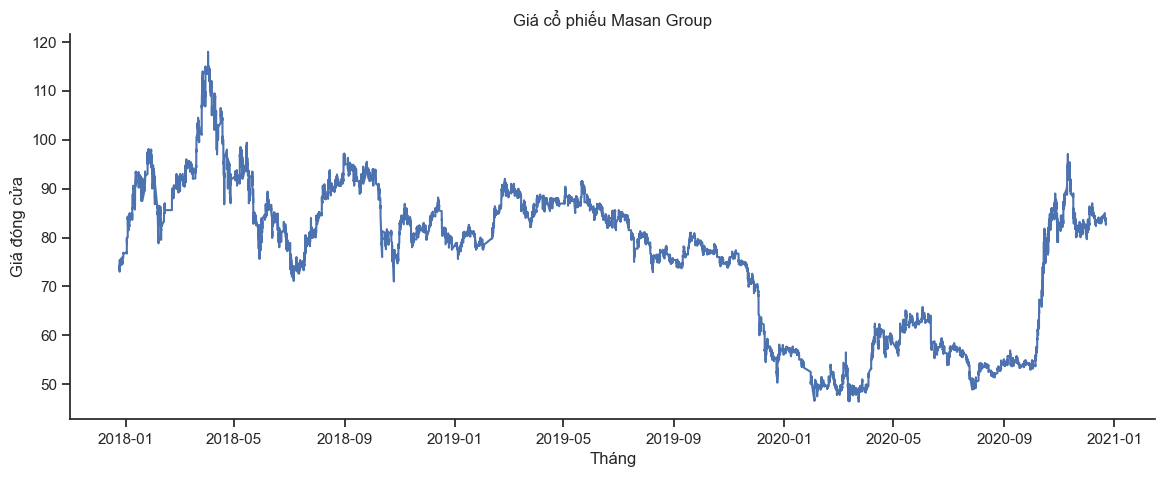

In [17]:
plt.figure(figsize=(14, 5))
sns.set_style("ticks")
sns.lineplot(data=df_msn, x="Date/Time", y="Close")
sns.despine()
plt.xlabel("Tháng")
plt.ylabel("Giá đóng cửa")
plt.title("Giá cổ phiếu Masan Group")

Mã cổ phiếu của Masan Group trong giai đoạn từ tháng 12/2017 đến tháng 12/2020 có xu hướng không ổn định và có sự biến động mạnh. Giai đoạn từ tháng 12/2017 đến tháng 09/2019 giá cổ phiếu có xu hướng đi ngang (ngoại trừ giá ATH tại tháng 5/2018 khi đạt gần 120.000 VND 1 cổ). Kể từ tháng 09/2019 đến tháng 03/2020 cổ phiếu giảm mạnh do tác động của dịch Covid và sau đó đã tăng trưởng trở lại.

Với xu hướng cổ phiếu biến động bất thường như thế này, gần như khó có thể sử dụng mô hình hồi quy tuyến tính. Tuy nhiên chúng ta vẫn sẽ thử và sau đó so sánh với mô hình hồi quy đa thức. Ngoài ra sẽ kết hợp với hồi quy Ridge nhằm tránh bị Overfitting hoặc Underfitting do dựa theo biểu đồ có xuất hiện dữ liệu ngoại lai chính là lúc cổ phiếu đạt ATH vào tháng 05/2018

# Phát triển mô hình

## Mô hình hồi quy tuyến tính

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# Tiền xử lý dữ liệu để train và fit vào mô hình học máy
df_msn['date'] = df_msn['Date/Time'].dt.day
df_msn['month'] = df_msn['Date/Time'].dt.month
df_msn['year'] = df_msn['Date/Time'].dt.year
df_msn['hour'] = df_msn['Date/Time'].dt.hour
df_msn['minute'] = df_msn['Date/Time'].dt.minute
df_msn.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,date,month,year,hour,minute
0,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0,25,12,2017,9,15
1,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0,25,12,2017,9,16
2,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0,25,12,2017,9,18
3,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0,25,12,2017,9,20
4,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0,25,12,2017,9,21


In [23]:
x_data = df_msn[["date", "month", "year", "hour", "minute"]]
y_data = df_msn["Close"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
print("Số mẫu dùng để huấn luyện mô hình:", x_train.shape[0])
print("Số mẫu dùng để kiểm tra mô hình:", x_test.shape[0])

Số mẫu dùng để huấn luyện mô hình: 108283
Số mẫu dùng để kiểm tra mô hình: 27071


In [24]:
# Tạo dựng và huấn luyện mô hình hồi quy tuyến tính
lre = LinearRegression()
lre.fit(x_train, y_train)

LinearRegression()

Kiểm tra mô hình với chính tập dữ liệu vừa dùng để huấn luyện

In [26]:
y_hat = lre.predict(x_train)

In [27]:
# Tạo đồ thị phân phối để trực quan hóa dữ so sánh giữa dữ liệu trả về bởi mô hình với dữ liệu thực tế dùng để huấn luyện
"""ActualFunction là tập dữ liệu thực thế dùng đẻ train
   ModelFunction là tập dữ liệu trả về (biến yhat_train) sau khi áp dụng mô hình
   ActualName và ModelName là những biến tên để hiển thị trên biểu đồ"""
def DistributionPlot(ActualFunction, ModelFunction, ActualName, ModelName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
    ax1 = sns.distplot(ModelFunction, hist=False, color='b', label=ModelName)
    
    plt.title(Title)
    plt.xlabel("Giá (theo VND)")
    plt.ylabel("Xác suất thời điểm có giá này")
    plt.legend()
    
    plt.show()
    plt.close()

C:\Users\pc\AppData\Local\Temp\ipykernel_18680\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_18680\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

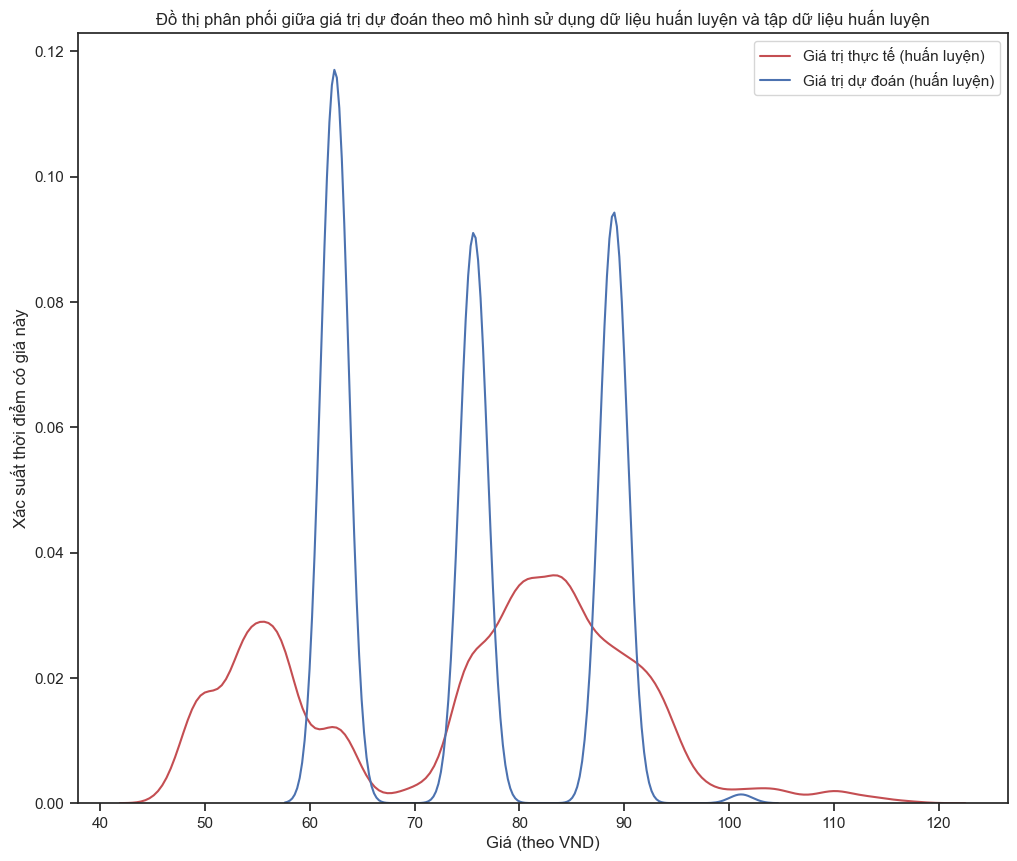

In [28]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu huấn luyện và tập dữ liệu huấn luyện"
DistributionPlot(y_train, y_hat, "Giá trị thực tế (huấn luyện)", "Giá trị dự đoán (huấn luyện)", Title)

In [29]:
# Kiểm tra chỉ số R^2 để xem xét độ chính xác của mô hình
print("Chỉ số R^2 của mô hình đối với tệp dữ liệu huấn luyện là", lre.score(x_train, y_train))

Chỉ số R^2 của mô hình đối với tệp dữ liệu huấn luyện là 0.5299253999241216


Kiểm tra mô hình với tập dữ liệu test

In [30]:
y_hat_test = lre.predict(x_test)

C:\Users\pc\AppData\Local\Temp\ipykernel_18680\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_18680\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

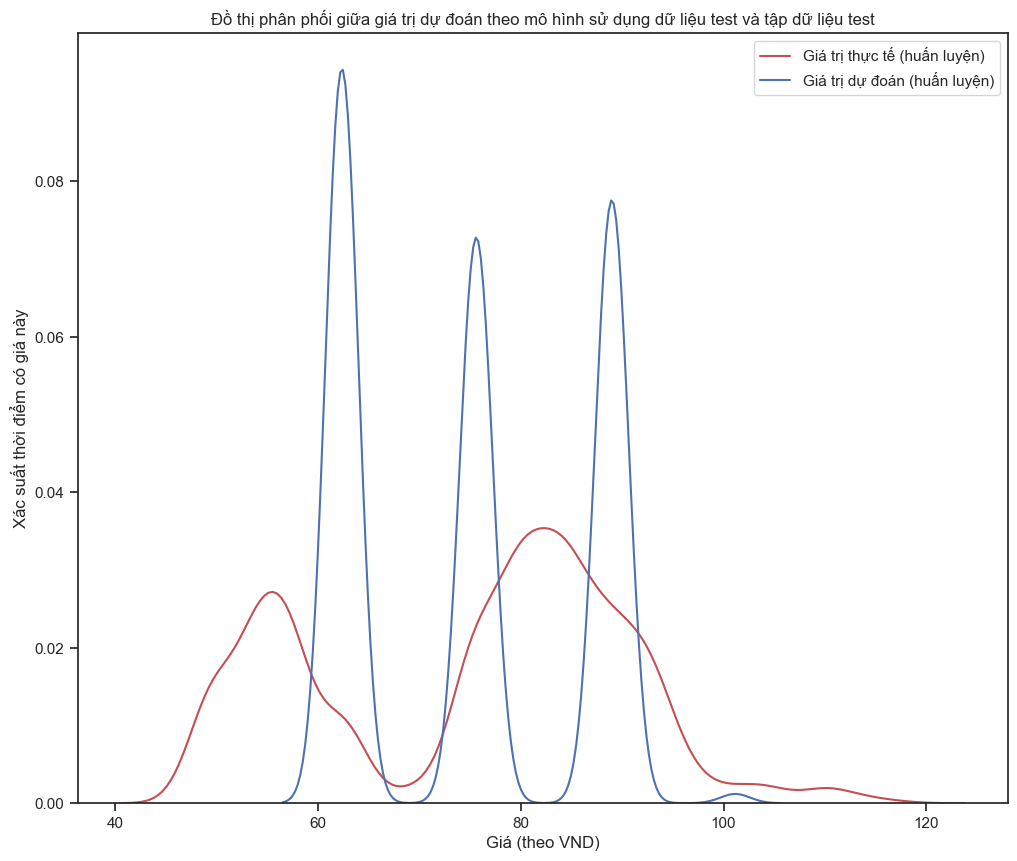

In [31]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu test và tập dữ liệu test"
DistributionPlot(y_test, y_hat_test, "Giá trị thực tế (huấn luyện)", "Giá trị dự đoán (huấn luyện)", Title)

In [32]:
# Kiểm tra chỉ số R^2 để xem xét độ chính xác của mô hình
print("Chỉ số R^2 của mô hình đối với tệp dữ liệu huấn luyện là", lre.score(x_test, y_test))

Chỉ số R^2 của mô hình đối với tệp dữ liệu huấn luyện là 0.5288574805134929


Đúng như dự đoán độ chính xác của mô hình hồi quy là khá thấp (chỉ số R^2 chỉ đạt khoảng 0.53 cho cả 2 tập dữ liệu dùng để train và test). Chính vì vậy ta sẽ chuyển sang sử dụng mô hình hồi quy đa thức

## Mô hình hồi quy đa thức

In [33]:
from sklearn.preprocessing import PolynomialFeatures

Chọn số bậc thích hợp dựa trên giá trị R^2

Text(0.5, 1.0, 'Chỉ số R^2 của từng bậc hồi quy đa thức dựa trên dữ liệu test')

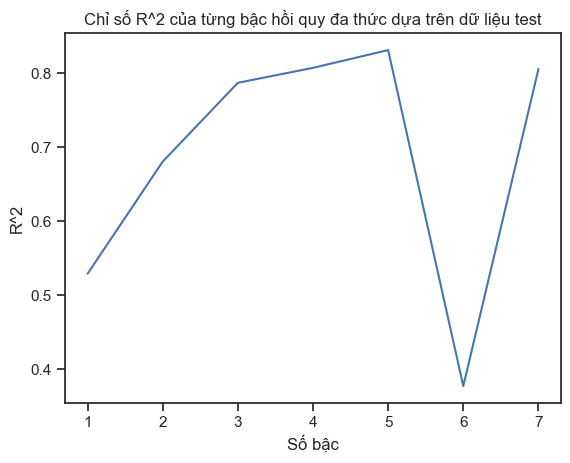

In [36]:
Rsquared_test = list()
order = list(range(1, 8))
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lre.fit(x_train_pr, y_train)
    Rsquared_test.append(lre.score(x_test_pr, y_test))

plt.plot(order, Rsquared_test)
plt.xlabel("Số bậc")
plt.ylabel("R^2")
plt.title("Chỉ số R^2 của từng bậc hồi quy đa thức dựa trên dữ liệu test")

Có thể nhận thấy mô hình hồi quy bậc 5 cho ra chỉ số R^2 cao nhất, mô hình hồi quy bậc 7 trở lên có thể cho ra chỉ số R^2 cao hơn tuy nhiên do sẽ mất rất nhiều thời gian để chạy mô hình nên ta sẽ chọ mô hình bậc 5 nhằm tối ưu.

In [37]:
pr5 = PolynomialFeatures(degree=5)
x_train_pr5 = pr5.fit_transform(x_train)
x_test_pr5 = pr5.fit_transform(x_test)
lre.fit(x_train_pr5, y_train)
yhat_test_pr5 = lre.predict(x_test_pr5)

C:\Users\pc\AppData\Local\Temp\ipykernel_18680\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_18680\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

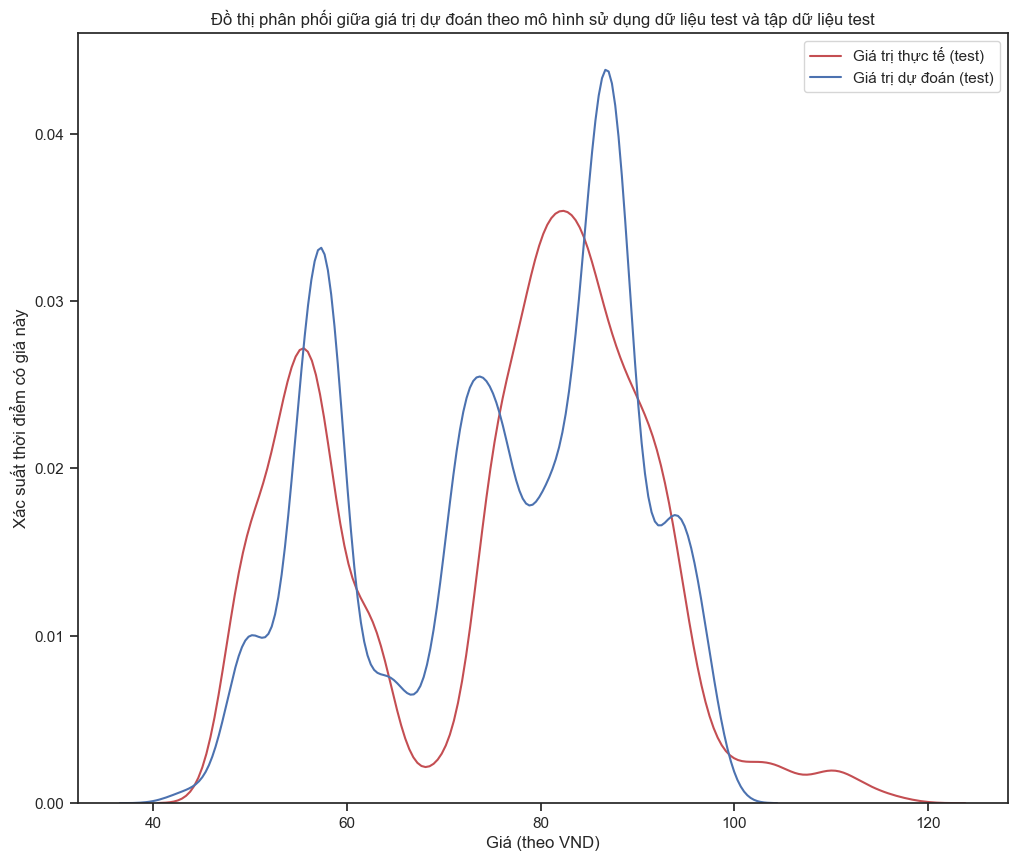

In [38]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu test và tập dữ liệu test"
DistributionPlot(y_test, yhat_test_pr5, "Giá trị thực tế (test)", "Giá trị dự đoán (test)", Title)

In [41]:
print("Giá trị dự đoán:", yhat_test_pr5[0:4])
print("Giá trị thực tế:", y_test[0:4].values)

Giá trị dự đoán: [89.40331459 65.87340355 84.56548119 50.15026665]
Giá trị thực tế: [88.1 55.8 92.7 50.9]


In [50]:
print("Chỉ số R^2 của mô hình hồi quy đa thức bậc 5 đối với tệp dữ liệu test là", lre.score(x_test_pr5, y_test))

Chỉ số R^2 của mô hình hồi quy đa thức bậc 5 đối với tệp dữ liệu test là 0.8311787882938075


Dựa trên đồ thị phân phối trên ta có thể thấy ở đoạn cuối một vài giá trị dự đoán bị underfitting so với giá trị thực tế, điều này do sự xuất hiện của tập dữ liệu ngoại lai diễn ra bất thường vào tháng 03/2018 đến tháng 05/2018 khi giá cổ phiếu liên tục đạt ATH. Do vậy ta cần sử dụng hồi quy Ridge nhằm giảm bớt đi sự sai lệch này

## Hồi quy Ridge

Tìm kiếm mô hình hồi quy Ridge với hệ số alpha cho ra chỉ số R^2 tốt nhất

In [43]:
from sklearn.linear_model import Ridge
from tqdm import tqdm

In [46]:
Rsquared_test = list()
Alpha = [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]

for alpha in Alpha:
    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr5, y_train)
    Rsquared_test.append(RidgeModel.score(x_test_pr5, y_test))

for alpha, r_squared in zip(Alpha, Rsquared_test):
    print("Với alpha =", alpha)
    print("R^2 =", r_squared, "\n")

Với alpha = 0.001
R^2 = 0.7696893197885766 

Với alpha = 0.1
R^2 = 0.770859644414724 

Với alpha = 1
R^2 = 0.7797193490502364 

Với alpha = 10
R^2 = 0.8141183954746282 

Với alpha = 100
R^2 = 0.8316540910776222 

Với alpha = 1000
R^2 = 0.8313754036056796 

Với alpha = 10000
R^2 = 0.8297463896901921 

Với alpha = 100000
R^2 = 0.8244581121148651 

Với alpha = 100000
R^2 = 0.8244581121148651 



Ta sẽ chọn alpha = 100 với chỉ số R^2 cao nhất

In [47]:
BestRR = Ridge(alpha = 100)
BestRR.fit(x_train_pr5, y_train)
Yhat_RR = BestRR.predict(x_test_pr5)

C:\Users\pc\AppData\Local\Temp\ipykernel_18680\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_18680\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

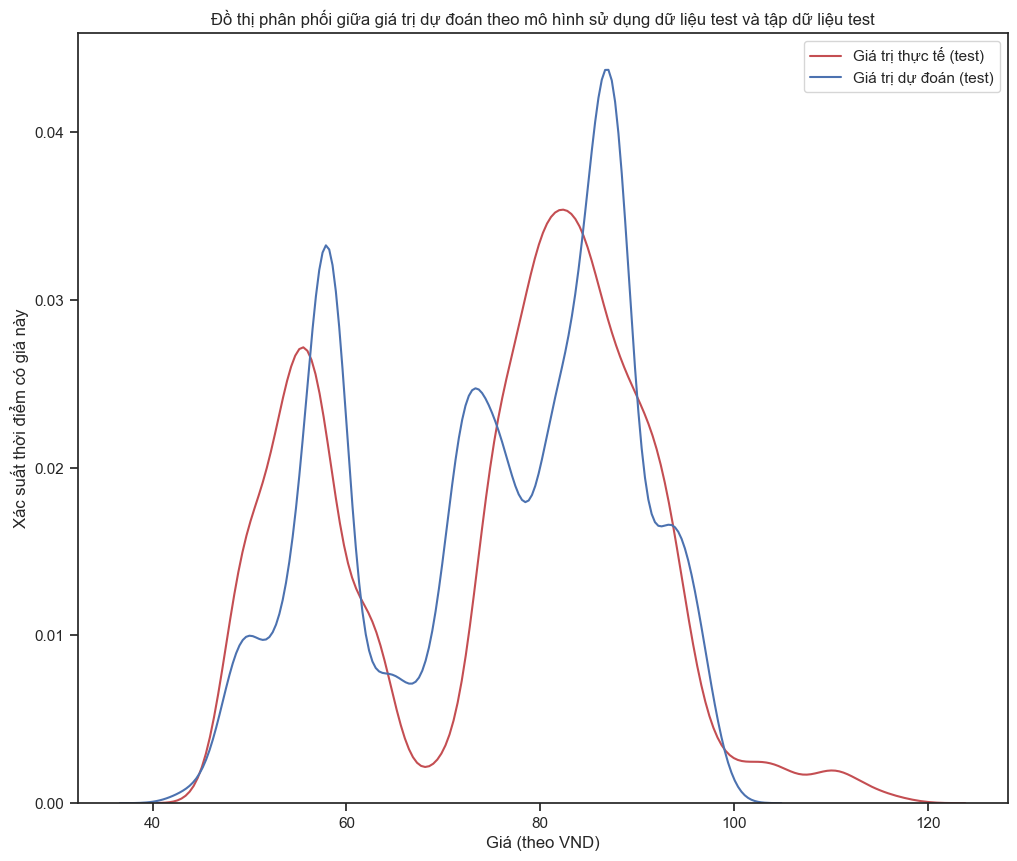

In [48]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu test và tập dữ liệu test"
DistributionPlot(y_test, Yhat_RR, "Giá trị thực tế (test)", "Giá trị dự đoán (test)", Title)

In [49]:
print("Giá trị dự đoán:", Yhat_RR[0:4])
print("Giá trị thực tế:", y_train[0:4].values)

Giá trị dự đoán: [88.96322441 67.17655754 84.81602287 49.40436363]
Giá trị thực tế: [87.4 81.  84.3 49. ]


In [52]:
print("Chỉ số R^2 của mô hình hồi quy Ridge đối với tệp dữ liệu test là", BestRR.score(x_test_pr5, y_test))

Chỉ số R^2 của mô hình hồi quy Ridge đối với tệp dữ liệu test là 0.8316540910776222


# Kết luận: Mô hình hồi quy Ridge (BestRR) sẽ là mô hình hiệu quả nhất